In [1]:
import numpy as np
import tensorflow as tf
from utils_functions import *
from plan import *
import random
from main import *

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.utils  import plot_model
from tensorflow.keras.utils  import Sequence
import datetime, os

#from matplotlib import pyplot as plt
import optuna



In [2]:
# controllo di star effettivamente usando la GPU

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices('GPU'))
print("nome gpu: ",tf.test.gpu_device_name())

Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
nome gpu:  /device:GPU:0


## Preparazione dati

### Caricamento dataset statici

### AE classico

In [3]:
test=load_file("./Dataset/set_test")
train=load_file("./Dataset/set_training")
validation=load_file("./Dataset/set_validation")

test=np.array(test,dtype=np.int8)
train=np.array(train,dtype=np.int8)
validation=np.array(validation,dtype=np.int8)
 

File loaded
File loaded
File loaded


## Modello

### AutoEncoder Base

In [19]:

logdir = os.path.join("./TestLogs/", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10),
    tf.keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1, write_graph=True, write_images=True)

]



#PARAM:
#tf.keras.regularizers.L1(l1=1e-4)
param={"INPUT_SIZE" : 340,
"HIDDEN_SIZE" : 170,
"HIDDEN_SIZE2" : None,
"HIDDEN_SIZE3" : None,
"CODE_SIZE" :75,
"KERNEL_INIZIALIZER":"he_uniform",
"KERNEL_REGULIZER":tf.keras.regularizers.L2(l2=1e-5),
'BIAS_REGULARIZER': None,
"ACTIVATION":'relu',
"OPTIMIZER":tf.keras.optimizers.Adam(learning_rate=0.0001),
"EPOCHS":2000,
"BATCH_SIZE":150,
#"BATCH_NORMAIZATION": 0
}

autoencoder=tf.keras.models.Sequential()

autoencoder.add(Input(shape=(param["INPUT_SIZE"],)))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add( Dense(param["HIDDEN_SIZE"], activation=param["ACTIVATION"], kernel_initializer=param["KERNEL_INIZIALIZER"],kernel_regularizer=param["KERNEL_REGULIZER"], bias_regularizer=param["BIAS_REGULARIZER"] ))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(Dense(param["CODE_SIZE"], activation=param["ACTIVATION"],kernel_initializer=param["KERNEL_INIZIALIZER"],kernel_regularizer=param["KERNEL_REGULIZER"],bias_regularizer=param["BIAS_REGULARIZER"],name="embedding"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(Dense(param["HIDDEN_SIZE"], activation=param["ACTIVATION"], kernel_initializer=param["KERNEL_INIZIALIZER"],kernel_regularizer=param["KERNEL_REGULIZER"], bias_regularizer=param["BIAS_REGULARIZER"] ))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add( Dense(param["INPUT_SIZE"], activation='sigmoid'))


#variare learning_rate beta_1,beta_2, da fare per ultimo
#batch_size ???
autoencoder.compile(optimizer=param["OPTIMIZER"], loss='binary_crossentropy',metrics=["accuracy","Precision","Recall"])
history=autoencoder.fit(x=train,y=train, epochs=param["EPOCHS"],batch_size=param["BATCH_SIZE"], validation_data=(validation,validation), 
                        callbacks=my_callbacks)

 #Gardare i risulati delle metriche su tensorbord                      

Epoch 1/2000
6153/6153 [==============================] - 60s 9ms/step - loss: 0.1675 - accuracy: 0.1236 - precision: 0.4064 - recall: 0.4898 - val_loss: 0.0387 - val_accuracy: 0.1296 - val_precision: 0.9736 - val_recall: 0.8386
Epoch 2/2000
6153/6153 [==============================] - 55s 9ms/step - loss: 0.0307 - accuracy: 0.1136 - precision: 0.9696 - recall: 0.8669 - val_loss: 0.0189 - val_accuracy: 0.1343 - val_precision: 0.9727 - val_recall: 0.9483
Epoch 3/2000
6153/6153 [==============================] - 55s 9ms/step - loss: 0.0213 - accuracy: 0.1125 - precision: 0.9701 - recall: 0.9168 - val_loss: 0.0142 - val_accuracy: 0.1305 - val_precision: 0.9753 - val_recall: 0.9651
Epoch 4/2000
6153/6153 [==============================] - 55s 9ms/step - loss: 0.0176 - accuracy: 0.1191 - precision: 0.9731 - recall: 0.9340 - val_loss: 0.0118 - val_accuracy: 0.1467 - val_precision: 0.9773 - val_recall: 0.9732
Epoch 5/2000
6153/6153 [==============================] - 57s 9ms/step - loss: 0.015

Epoch 36/2000
6153/6153 [==============================] - 57s 9ms/step - loss: 0.0045 - accuracy: 0.2877 - precision: 0.9878 - recall: 0.9840 - val_loss: 0.0026 - val_accuracy: 0.2418 - val_precision: 0.9925 - val_recall: 0.9930
Epoch 37/2000
6153/6153 [==============================] - 57s 9ms/step - loss: 0.0044 - accuracy: 0.2972 - precision: 0.9881 - recall: 0.9845 - val_loss: 0.0028 - val_accuracy: 0.2816 - val_precision: 0.9895 - val_recall: 0.9951
Epoch 38/2000
6153/6153 [==============================] - 57s 9ms/step - loss: 0.0043 - accuracy: 0.3024 - precision: 0.9883 - recall: 0.9849 - val_loss: 0.0025 - val_accuracy: 0.2181 - val_precision: 0.9925 - val_recall: 0.9935
Epoch 39/2000
6153/6153 [==============================] - 57s 9ms/step - loss: 0.0042 - accuracy: 0.3107 - precision: 0.9885 - recall: 0.9852 - val_loss: 0.0026 - val_accuracy: 0.2408 - val_precision: 0.9907 - val_recall: 0.9948
Epoch 40/2000
6153/6153 [==============================] - 58s 9ms/step - loss: 

6153/6153 [==============================] - 55s 9ms/step - loss: 0.0030 - accuracy: 0.4420 - precision: 0.9918 - recall: 0.9907 - val_loss: 0.0019 - val_accuracy: 0.4364 - val_precision: 0.9934 - val_recall: 0.9971
Epoch 72/2000
6153/6153 [==============================] - 74s 12ms/step - loss: 0.0030 - accuracy: 0.4509 - precision: 0.9919 - recall: 0.9907 - val_loss: 0.0019 - val_accuracy: 0.4947 - val_precision: 0.9939 - val_recall: 0.9969
Epoch 73/2000
6153/6153 [==============================] - 61s 10ms/step - loss: 0.0030 - accuracy: 0.4508 - precision: 0.9920 - recall: 0.9908 - val_loss: 0.0019 - val_accuracy: 0.5046 - val_precision: 0.9933 - val_recall: 0.9973
Epoch 74/2000
6153/6153 [==============================] - 56s 9ms/step - loss: 0.0029 - accuracy: 0.4576 - precision: 0.9920 - recall: 0.9908 - val_loss: 0.0020 - val_accuracy: 0.5029 - val_precision: 0.9917 - val_recall: 0.9978
Epoch 75/2000
6153/6153 [==============================] - 57s 9ms/step - loss: 0.0029 - acc

### Print and Test ae

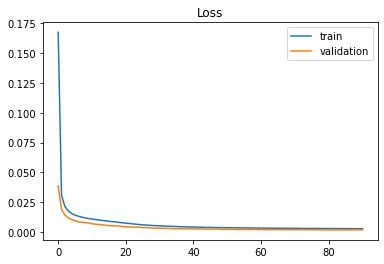

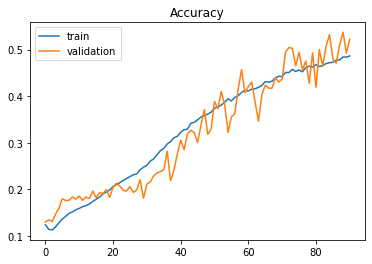

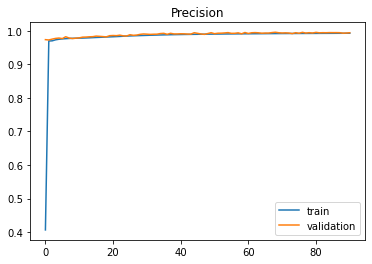

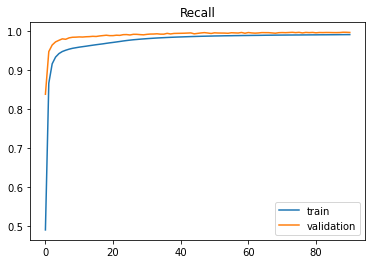

In [20]:

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.title("Loss")
plt.show()
    
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.title("Accuracy")
plt.show()

plt.plot(history.history['precision'], label='train')
plt.plot(history.history['val_precision'], label='validation')
plt.legend()
plt.title("Precision")
plt.show()

plt.plot(history.history['recall'], label='train')
plt.plot(history.history['val_recall'], label='validation')
plt.legend()
plt.title("Recall")
plt.show()




In [21]:
#val_predictions = autoencoder.predict(validation)
test_predictions = autoencoder.predict(test)

Numero di vettori decodificati correttamente: 208708 su 230728 totali 
Rapporto: 90.456% 
Media num di errori per array: 0.144



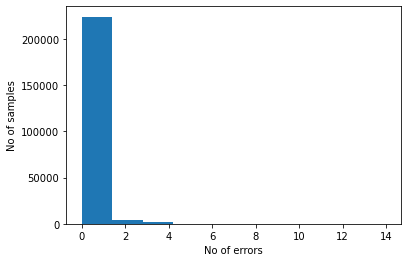

In [22]:
arr=results_info(test,test_predictions,logdir) 

In [23]:
#Se i risultati sono buoni salva il modello in modo che possa essere riusato

dir_model= os.path.join(logdir,"myModel")
autoencoder.save(dir_model)

autoencoder.summary()

INFO:tensorflow:Assets written to: ./TestLogs/20220729-172616\myModel\assets
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_12 (Batc (None, 340)               1360      
_________________________________________________________________
dense_9 (Dense)              (None, 170)               57970     
_________________________________________________________________
batch_normalization_13 (Batc (None, 170)               680       
_________________________________________________________________
embedding (Dense)            (None, 75)                12825     
_________________________________________________________________
batch_normalization_14 (Batc (None, 75)                300       
_________________________________________________________________
dense_10 (Dense)             (None, 170)               12920     
___________________________________________